# PRÁTICA INDEPENDENTE: Naive Bayes - Solução.

#### Nessa prática independente vamos explorar o dataset [`iris`](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_iris.html) e realizar a separação das espécies das flores com o auxílio do método de Naive Bayes.

#### Exercício 1: importe as bibliotecas necessárias para a aplicação do modelo. 

In [22]:
#import numpy as np
#import pandas as pd
from matplotlib import pyplot as plt
import matplotlib.colors as colors
import seaborn as sns
#import itertools
from scipy.stats import norm
import scipy.stats
from sklearn.naive_bayes import GaussianNB
import numpy as np

%matplotlib inline
sns.set()

In [23]:
#Load the data set
iris = sns.load_dataset('iris')
iris = iris.rename(index = str, 
                   columns = {'sepal_length':'1_sepal_length',
                              'sepal_width':'2_sepal_width', 
                              'petal_length':'3_petal_length', 
                              'petal_width':'4_petal_width'
                             }
                  )

#### Exercício 2: Plote a dispersão das espécies de flores para os atributos `sepal_length` e `sepal_width`. 

#### Você pode aplicar os métodos [`FacetGrid()`](https://seaborn.pydata.org/generated/seaborn.FacetGrid.html) e [`map()`](https://seaborn.pydata.org/generated/seaborn.FacetGrid.map.html) para isso.

#### Depois crie um novo dataframe com os atributos `sepal_length`, `sepal_width` e `species` para a posterior classificação das espécies de flores.

Text(0.5, 1, 'Scatter plot')

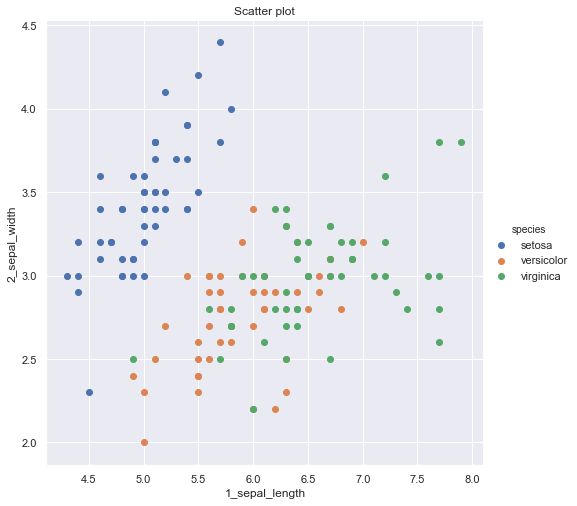

In [24]:
sns.FacetGrid(iris, 
              hue = 'species', 
              height = 7).map(plt.scatter, 
                            '1_sepal_length', 
                            '2_sepal_width'
                           ).add_legend()
plt.title('Scatter plot')

In [25]:
df1 = iris[['1_sepal_length', 
            '2_sepal_width', 
            'species'
           ]
          ]

#### Exercício 3: Subdivida o dataset secundário criado na questão anterior entre atributos descritivos e targets e substitua os nomes das espécies associadas às observações pode valores numéricos `(0, 1, 2)`. Instancie um modelo [`GaussianNB()`](https://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.GaussianNB.html) e ajuste os dados com o método [`.fit()`](https://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.GaussianNB.html#sklearn.naive_bayes.GaussianNB.fit).

#### Em seguida use o método [`.linspace()`](https://numpy.org/doc/stable/reference/generated/numpy.linspace.html) para criar duas listas `X` e `y`, de até `100` pontos, espaçados uniformemente dentro do intervalo especificado na primeira dispersão plotada para (`sepal_length`, `sepal_width`).

#### Por fim monte, com o auxílio do método [`.meshgrid()`](https://numpy.org/doc/stable/reference/generated/numpy.meshgrid.html), uma matriz de coordenadas a partir dos vetores de coordenadas `X`  e `Y`. 

In [26]:
from sklearn.naive_bayes import GaussianNB

#Setup X and y data
X_data = df1.iloc[:,0:2]
y_labels = df1.iloc[:,2].replace({'setosa':0, 
                                  'versicolor':1, 
                                  'virginica':2}).copy()

#Fit model
model_sk = GaussianNB(priors = None)
model_sk.fit(X_data,y_labels)

GaussianNB()

In [27]:
# Our 2-dimensional classifier will be over variables X and Y
N = 100
X = np.linspace(4, 8, N)
Y = np.linspace(1.5, 5, N)
X, Y = np.meshgrid(X, Y)

#### Exercício 4: Para terminar, vamos delinear os limites de decisão entre os diferentes campos para as espécies das flores do dataset. Para isso estude as funções:

* [`FacetGrid()`](https://seaborn.pydata.org/generated/seaborn.FacetGrid.html) para inicializar um objeto de plotagem com os dados das espécies das flores.

* [`np.array()`](https://numpy.org/doc/stable/reference/generated/numpy.array.html) para criar um arranjo que receba as previsões realizadas.

* [`.predict()`](https://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.MultinomialNB.html#sklearn.naive_bayes.MultinomialNB.predict) para executar a classificação dos dados em `X` e `Y`.

* [`zip()`](https://docs.python.org/3.3/library/functions.html#zip) para criar um iterador que agregue elementos de `np.ravel(X)` e `np.ravel(Y)`.

* [`.ravel()`](https://numpy.org/doc/stable/reference/generated/numpy.ravel.html) que converterá as matrizes `X` e `Y` às formas apropriadas para as predições.

* [`.reshape()`](https://numpy.org/doc/stable/reference/generated/numpy.reshape.html) para alterar a forma da matriz de previões, de modo a submetê-la à mesma forma das matrizes `X` e `Y` definidas anteriormente.

* [`.contour()`](https://matplotlib.org/3.2.2/api/_as_gen/matplotlib.pyplot.contour.html) para desenhar as linhas de delineação entre as classificações das espécies.

* [`.contourf()`](https://matplotlib.org/api/_as_gen/matplotlib.pyplot.contourf.html) para preencher os espaços de classificação com as cores adequadas para cada espécie.

    1. Instancie um objeto que receba o arranjo gráfico defido por `.FacetGrid()`.
    2. Compute a função de classe prevista para cada valor na grade com as funções `.array()`, `.predict()` e `zip()` e `.ravel()`.
    3. Remodele a classe prevista para a forma `.meshgrid()` com a função `.reshape()`.
    4. Trace os contornos preenchidos com `.contourf()` e de contorno com `.contour()`.
    5. Adicione os eixos 'Sepal length' e 'Sepal width' e o título 'Limites de decisão de Gaussian Naive Bayes' com as funções `.set_xlabel()`, `.set_xlabel()` e `.set_title()`.
    6. Plote o gráfico final com a função `.show()`.

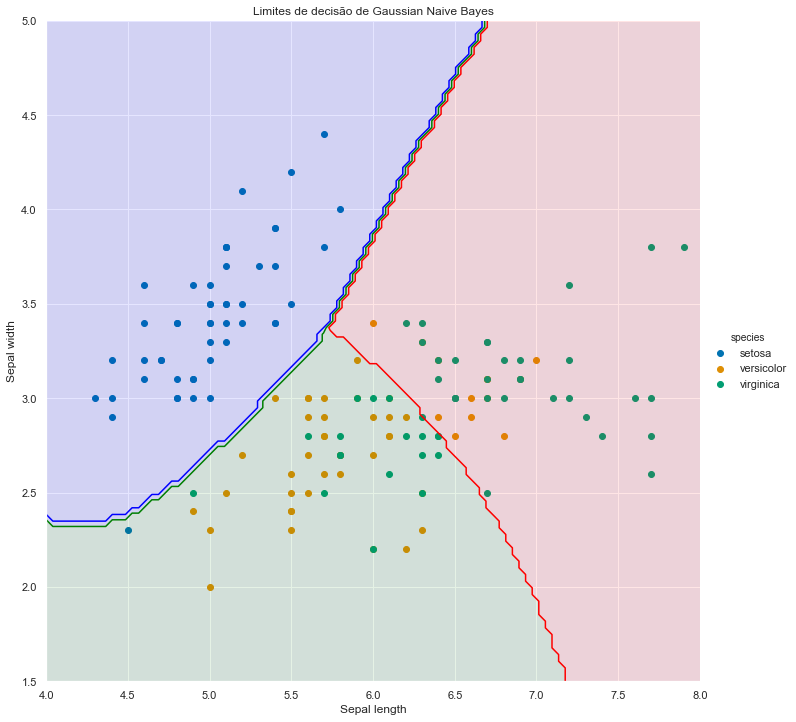

In [28]:
g = sns.FacetGrid(iris, 
                  hue = "species", 
                  height = 10, 
                  palette = 'colorblind').map(plt.scatter, 
                                              '1_sepal_length', 
                                              '2_sepal_width',).add_legend()
my_ax = g.ax

zz = np.array(  [model_sk.predict( [[xx, yy]])[0] for xx, yy in zip(np.ravel(X), np.ravel(Y)) ] )

Z = zz.reshape(X.shape)


my_ax.contourf( X, Y, Z, 2, alpha = .1, colors = ('blue','green','red'))
my_ax.contour( X, Y, Z, 2, alpha = 1, colors = ('blue','green','red'))

my_ax.set_xlabel('Sepal length')
my_ax.set_ylabel('Sepal width')
my_ax.set_title('Limites de decisão de Gaussian Naive Bayes')

plt.show()

#### Use a função [`.score()`](https://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.GaussianNB.html#sklearn.naive_bayes.GaussianNB.score) para calcular a curácia de sua classificação.

In [29]:
#Sklearn accuracy
display(model_sk.score(X_data,
                       y_labels
                      )
       )

0.78